In [1]:
# https://hub.arcgis.com/pages/a0db1c6905934fb5a522137f0fec6c7b
# https://spatialvision.com.au/blog-open-source-spatial-geopandas-part-1/

import matplotlib.pyplot as plt

import geopandas as gpd
# folium pesquisar

Matplotlib is building the font cache; this may take a moment.


# Extração de shapes e Plots

- Extração de região geográfica de interesse (bbbike) no formato .shp
- Plot de shapes

shape: (1015, 8)


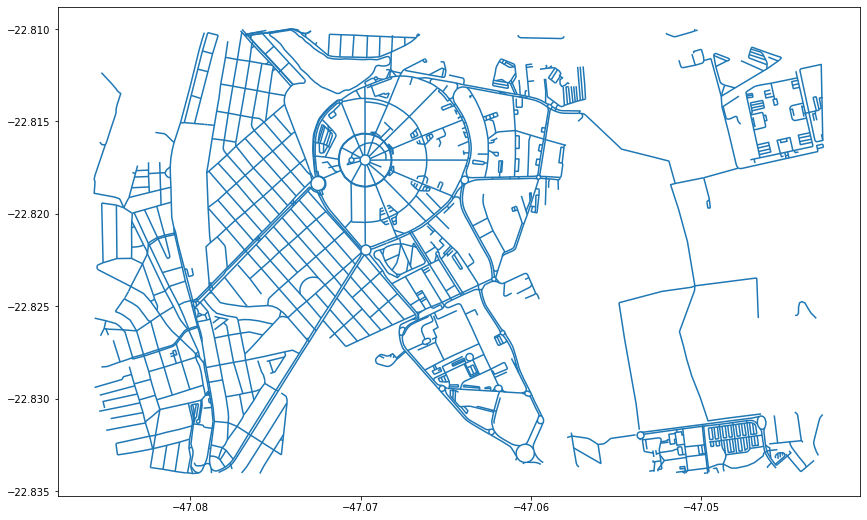

In [2]:
# bbbike: https://extract.bbbike.org/
# use bbbike to obtain shape files

# Unicamp Shapes:
# landuse
# natural
# places
# points
# railways
# roads
# waterways
# buildings

unicamp_df_roads = gpd.read_file('unicamp/shape/roads.shp')
print('shape:', unicamp_df_roads.shape)
ax = unicamp_df_roads.plot(figsize=(17, 9))

In [3]:
unicamp_df = gpd.read_file('unicamp/shape/buildings.shp')

print('shape:', unicamp_df.shape)
unicamp_df.head()

shape: (509, 4)


,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-47.06377 -22.81368, -47.06375 -22.8..."
1,95011157,Banco Santander,bank,"POLYGON ((-47.06880 -22.81689, -47.06881 -22.8..."
2,95011161,Ciclo Básico II,university,"POLYGON ((-47.07069 -22.81797, -47.07050 -22.8..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."
4,95011172,IC 3.5,university,"POLYGON ((-47.06422 -22.81356, -47.06417 -22.8..."


In [4]:
print(unicamp_df.geometry.iloc[0])

POLYGON ((-47.063773 -22.8136798, -47.0637523 -22.8136705, -47.0636838 -22.8138006, -47.0640575 -22.8139678, -47.0641095 -22.8138691, -47.0640289 -22.813833, -47.0641053 -22.8136878, -47.0639184 -22.8136043, -47.0638586 -22.8137178, -47.0638184 -22.8136998, -47.063773 -22.8136798))


In [5]:
# crs - sistema de coordenadas
unicamp_df.crs

# WGS 84 - sistema de coords mundial (degree)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

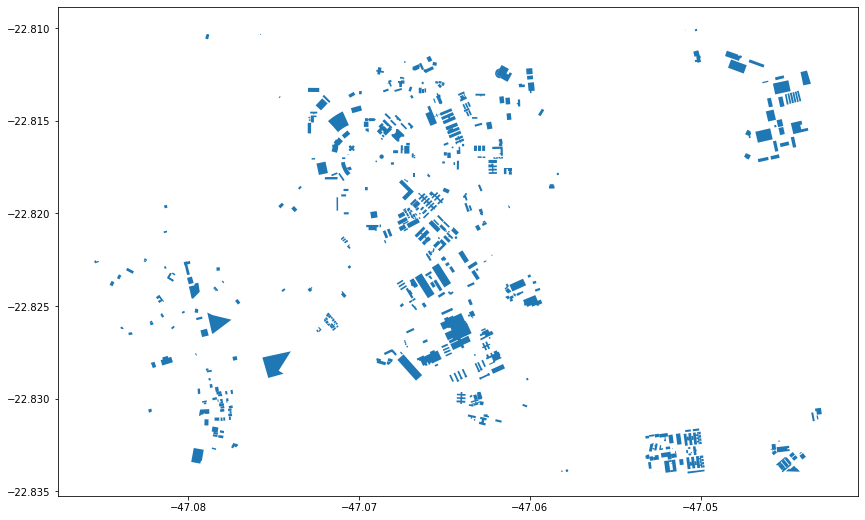

In [6]:
ax = unicamp_df.plot(figsize=(17, 9))

,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."


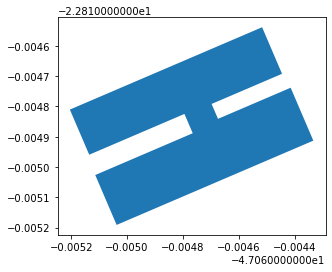

In [7]:
ic_predio = unicamp_df.query('osm_id == 95011169')
ax = ic_predio.plot()
ic_predio.head()

# SIRGAS 2000 / UTM zone 23S 

Conversão de CRS WGS 84 para SIRGAS 2000, que é dado em metros e representa o sistemas de georeferência das Américas.

Características:

- Datum: SIRGAS 2000
- Projeção: UTM zone 23S (Campinas/SP)
- América Latina
- Hemisfério sul. 

Referências:
- https://epsg.io/31981
- https://spatialreference.org/ref/?search=31981
- https://pt.slideshare.net/JorgeSantos30/20141011-qgis24-sistemadereferenciadecoordenadas
- https://ocefpaf.github.io/python4oceanographers/blog/2013/12/16/utm/
- https://cursos.alura.com.br/forum/topico-erro-ao-reprojetar-usando-a-funcao-to_crs-77139


In [8]:
unicamp_dff = gpd.read_file('unicamp/shape/buildings.shp')
unicamp_df.head()

,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-47.06377 -22.81368, -47.06375 -22.8..."
1,95011157,Banco Santander,bank,"POLYGON ((-47.06880 -22.81689, -47.06881 -22.8..."
2,95011161,Ciclo Básico II,university,"POLYGON ((-47.07069 -22.81797, -47.07050 -22.8..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."
4,95011172,IC 3.5,university,"POLYGON ((-47.06422 -22.81356, -47.06417 -22.8..."


In [9]:

# unicamp_utm_df = unicamp_dff.to_crs('+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84  +units=km +no_defs')  

# SIRGAS 2000 / UTM one 23S : 31983 # região da cidade de São Paulo
unicamp_utm_df = unicamp_dff.to_crs(31981)
unicamp_utm_df.crs

<Projected CRS: EPSG:31981>
Name: SIRGAS 2000 / UTM zone 21S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: South America - 60°W to 54°W, S hemisphere and SIRGAS 2000 by country
- bounds: (-60.0, -44.82, -54.0, 4.51)
Coordinate Operation:
- name: UTM zone 21S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

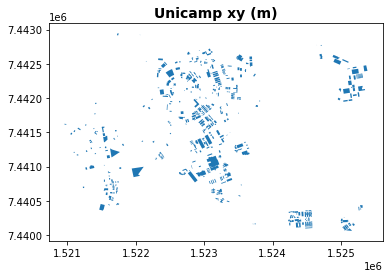

In [10]:
# ax = unicamp_utm_df.plot(figsize=(17, 9))
ax = unicamp_utm_df.plot()
unicamp_utm_df.head()

ttl = ax.title
# ttl.set_position([.5, 1.04])
plt.title('Unicamp xy (m)',fontweight='bold',fontsize=14)
plt.savefig('unicamp_predios.png', bbox_inches='tight')

In [11]:
print(ax.axis)
print(ax.axes)
print(ax.autoscale)

<bound method _AxesBase.axis of <AxesSubplot:title={'center':'Unicamp xy (m)'}>>
AxesSubplot(0.12675,0.125;0.7715x0.755)
<bound method _AxesBase.autoscale of <AxesSubplot:title={'center':'Unicamp xy (m)'}>>


In [12]:
# Get plot [bottom, top] & [left, right] (km)
print('y-axis range [bottom, top]:',ax.get_ylim())
print('x-axis range [left, right]:',ax.get_ylim())
# Get height and width (km)
height = (ax.get_ylim()[1] - ax.get_ylim()[0]) 
width = (ax.get_xlim()[1] - ax.get_xlim()[0]) 
print('\nY (m):', height, '\nX (m):', width, '\nArea (m2):', height * width )

# comparar area de estudo comparar com calculo feito em: 
# https://unicamp-arcgis.maps.arcgis.com/apps/View/index.html?appid=1d96ada62af4451bb4972b9779d09e66

y-axis range [bottom, top]: (7439914.781355322, 7443091.431733073)
x-axis range [left, right]: (7439914.781355322, 7443091.431733073)

Y (m): 3176.6503777503967 
X (m): 4869.111407272285 
Area (m2): 15467464.591220269


,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((1523124.241 7442348.144, 1523197.724..."


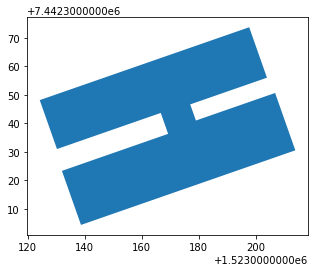

In [13]:
ic_predio = unicamp_utm_df.query('osm_id == 95011169')
ax = ic_predio.plot()

ic_predio.head()

# Normalização de dados

- Teste para normalizar polygono que representa predio do IC
- Normalizar escala de:

 minx          miny          maxx          maxy

[ 1.523123e+06  7.442303e+06  1.523215e+06  7.442375e+06]

para:

[ 0.          0.         89.66854577 69.34931372]




In [14]:
# MinMaxScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

import geopandas as gpd
import numpy as np
from shapely.geometry import mapping
from sklearn.preprocessing import MinMaxScaler

# get all coordinates of ic_predio.geometry polygon
g = [i for i in ic_predio.geometry]
all_coords = mapping(g[0])["coordinates"] # for first feature/row
a = list(all_coords)


# get total bounds of ic_predio.geometry polygon
minx, miny, maxx, maxy = ic_predio.total_bounds
# print(minx, miny, maxx, maxy)


# create lists to x and y coordinates
polygon_x = [list(a[0][i])[0] for i in range(len(a[0]))]
polygon_y = [list(a[0][i])[1] for i in range(len(a[0]))]
# print(polygon_x)
# print(polygon_y)
# print(len(polygon_y))


# convert to 2D array
data_x = np.array(polygon_x).reshape(-1, 1) # reshape -> 2D array
data_y = np.array(polygon_y).reshape(-1, 1)
# print(scaler_x.fit(data_x))
# print(scaler_x.data_max_)
# print(scaler_x.transform(data_x))


# rescale x and y
scaler_x = MinMaxScaler(feature_range=(0, maxx - minx))
scaler_y = MinMaxScaler(feature_range=(0, maxy - miny))

scaler_x.fit(data_x)
transform_x = scaler_x.transform(data_x)

scaler_y.fit(data_y)
transform_y = scaler_y.transform(data_y)


# convert np array x and y to polygon
newArray = np.append (transform_x, transform_y, axis=1)
new_polygon = Polygon(newArray)
print('Rescale polygon:\n\n', new_polygon)

boundary = gpd.GeoSeries(new_polygon)
boundary.plot(color='Green')

NameError: name 'Polygon' is not defined

In [ ]:
# diferença entre total_bounds e bounds
print(boundary.total_bounds)
boundary.bounds

# Quebrando Formas Geométricas (Prédios)

- Quebrar formas geometricas em retangulos para desenhar no ns3


Referências:
- https://shapely.readthedocs.io/en/stable/manual.html
- https://geopandas.org/docs/reference/geoseries.html

In [ ]:
# Geoseries: https://geopandas.org/docs/reference/geoseries.html
from shapely.geometry import Point, Polygon, LineString

def study_functions(building_geometry):
   
    # General methods and attributes

    print('\nArea:', building_geometry.area)
    print('\nLength:', building_geometry.length) # perimeter
    print('\nBounds:', building_geometry.bounds)
    print('\nTotal_bounds:', building_geometry.total_bounds)
    print('\nGeometry_type:', building_geometry.geom_type)
    print('\nExterior:', building_geometry.exterior)
    print('\nInterior:', building_geometry.interiors)

    # Unary predicates
    # print('\nis empty::', ic_predio['geometry'].is_empty) # also works
    print('\nIs empty:', building_geometry.is_empty)
    print('\nIs valid:', building_geometry.is_valid)
    print('\nHas z:', building_geometry.has_z) #  geometries that do not cross themselves

    # Geometric Manipulations
    # print('Boundary:', ic_predio.boundary.plot())
    print('\nEnvelop:', building_geometry['geometry'].envelope )
    print('\nConvex hull:', building_geometry['geometry'].convex_hull )
    print('\nSimplify:', building_geometry['geometry'].simplify )


# study_functions(ic_predio)

In [ ]:
p = ic_predio.geometry.values[0]
print('\nType:', p.geom_type, '\n')


print(ic_predio.geometry.values[0])
ic_predio.geometry.values[0]

In [ ]:
# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)

In [ ]:
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.ops import linemerge, unary_union, polygonize
from shapely.geometry import LineString, Polygon

# Define the Polygon and the cutting line

polygon = p

line_up = LineString([( 1523130.295850078, 7442330.986773305), (1523203.960573605, 7442356.013585)])
line_bottom = LineString([( 1523132.026113331, 7442323.327823416), (1523206.81569678, 7442350.649647839)])



def cut_polygon_by_line(polygon, line1, line2):
    merged = linemerge([polygon.boundary, line1,line2])
    borders = unary_union(merged)
    polygons = polygonize(borders)
    return list(polygons)

def plot_new_polygons(shapely_objects, figure_path='fig.png'):
    boundary = gpd.GeoSeries(shapely_objects)
    boundary.plot()
#     boundary.plot(color=['red', 'green', 'blue', 'orange', 'yellow'])

#     plt.savefig(figure_path)

result = cut_polygon_by_line(polygon, line_up, line_bottom)
print(result)
print('\nLength:', len(result))
print('\n', result[0])
print('\n', result[1])
print('\n', result[2])
print('\n', result[3])


# print()
# print(result[0].intersection(result[1]))
# print(result[0].intersection(result[2]))
# print(result[1].intersection(result[2]))

plot_new_polygons(result[1])
plot_new_polygons(result[2])
plot_new_polygons(result[3])

In [ ]:
# a = ic_predio.scale(5000, 6000)
# a.boundary.plot()

# Utilizando só as bordas

- Ao invés de quebrar o polígono em várias partes, utilizar os bounds para desenhar no NS3



In [ ]:
# gpd.options.display_precision = 9

round_ic_predio = ic_predio['geometry'].buffer(1) ## 2, 10, 200, 2000, etc
print(round_ic_predio.bounds)
print('\n',round_ic_predio.total_bounds)
round_ic_predio.plot()


# zoom 
# ax = round_ic_predio.plot()

# minx, miny, maxx, maxy = round_ic_predio.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)

In [ ]:
unicamp_utm_df['area'] = unicamp_utm_df.geometry.area # m2
unicamp_utm_df